In [12]:
import pandas as pd
import numpy as np
import sqlite3

In [52]:
import matplotlib as plt
import seaborn as sns

In [14]:
connection = sqlite3.connect('Airlines 2015/database.sqlite')
query = "SELECT * FROM sqlite_master"
db = pd.read_sql_query(sql = query, con = connection)
db

,type,name,tbl_name,rootpage,sql
0,table,Tweets,Tweets,2,CREATE TABLE Tweets (\n tweet_id INTEGER PR...


In [19]:
query = "SELECT airline, text, negativereason, airline_sentiment AS sentiment FROM 'Tweets'"

df = pd.read_sql_query(sql = query, con = connection)

display(df.shape, df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   airline         14485 non-null  object
 1   text            14485 non-null  object
 2   negativereason  14485 non-null  object
 3   sentiment       14485 non-null  object
dtypes: object(4)
memory usage: 452.8+ KB


(14485, 4)

,airline,text,negativereason,sentiment
0,Delta,@JetBlue's new CEO seeks the right balance to ...,,neutral
1,Delta,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,Can't Tell,negative
2,United,@united yes. We waited in line for almost an h...,Late Flight,negative
3,United,@united the we got into the gate at IAH on tim...,Late Flight,negative
4,Southwest,@SouthwestAir its cool that my bags take a bit...,Customer Service Issue,negative


None

In [50]:
df.sentiment.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [325]:
pd.set_option('display.max_rows', 5)

## 14,485 tweets

In [321]:
df.shape

(14485, 4)

## 257,868 non-unique terms

In [320]:
sum([len(d.split(' ')) for d in df['text']])

257868

In [1480]:
df.head(10)

,airline,text,negativereason,sentiment
0,Delta,@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Greenfield Daily Reporter http://t.co/LM3opxkxch,,neutral
1,Delta,@JetBlue is REALLY getting on my nerves !! 😡😡 #nothappy,Can't Tell,negative
2,United,@united yes. We waited in line for almost an hour to do so. Some passengers just left not wanting to wait past 1am.,Late Flight,negative
3,United,"@united the we got into the gate at IAH on time and have given our seats and closed the flight. If you know people is arriving, have to wait",Late Flight,negative
4,Southwest,"@SouthwestAir its cool that my bags take a bit longer, dont give me baggage blue balls-turn the carousel on, tell me it's coming, then not.",Customer Service Issue,negative
5,United,"@united and don't hope for me having a nicer flight some other time, try to do things right. You sold me those tickets with that connetion",Bad Flight,negative
6,United,@united I like delays less than you because I'm the one on the plane. Connect me with a voucher,Late Flight,negative
7,United,"@united, link to current status of flights/airports? Fly BWI-EWR-MCO this morning yet can't yet tell what any problems are except see snow.",Customer Service Issue,negative
8,Southwest,@SouthwestAir you guys there? Are we on hour 2 of our phone hold at 3am bc of volume or short staffing?,Customer Service Issue,negative
9,United,@united I tried 2 DM it would not go thru... not sure why,Customer Service Issue,negative


In [26]:
#No nulls

df.negativereason.isnull().values.any()

False

In [27]:
df.isnull().sum()

airline           0
text              0
negativereason    0
sentiment         0
dtype: int64

In [29]:
df.iloc[0].negativereason


''

In [51]:

df[df['negativereason'] == ''].sentiment.unique()

array(['neutral', 'positive'], dtype=object)

In [35]:
#NEGATIVE REASON has empty strings
df[df['negativereason']== ''].count()

airline           5403
text              5403
negativereason    5403
sentiment         5403
dtype: int64

In [38]:
df[df['sentiment']== ''].count()

airline           0
text              0
negativereason    0
sentiment         0
dtype: int64

In [54]:
#6 airlines
df.airline.unique()

array(['Delta', 'United', 'Southwest', 'US Airways', 'Virgin America',
       'American'], dtype=object)

## Initial plots

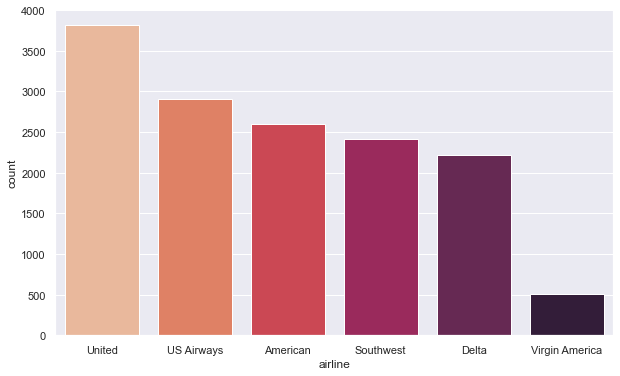

In [69]:
sns.countplot(x='airline', data=df, palette='rocket_r',
              order = df['airline'].value_counts().index);



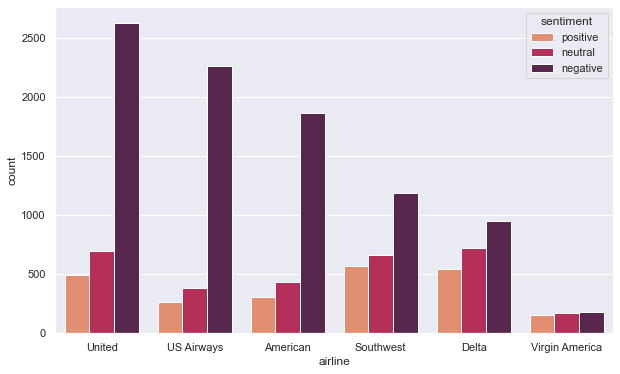

In [342]:
#REORDER THE GROUPINGS
sns.set(rc={"figure.figsize":(10, 6)}) 
sns.countplot(x='airline', hue='sentiment', data=df, palette='rocket_r', hue_order =['positive', 'neutral', 'negative'],
              order = df['airline'].value_counts().index);



## Text preprocessing

In [72]:
import re
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
#nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariyagraff/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariyagraff/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [100]:
import string

In [1331]:
df2 = df.copy()

In [ ]:
# # Using a variable for the top k features to be selected
# top_k_features=1000
# text_processor = Pipeline([
#  ('count vectorizer',CountVectorizer(stop_words=mystopwords,lowercase=True)),
#  ('chi2score',SelectKBest(chi2,k=top_k_features)),
#  ('tf_transformer',TfidfTransformer(use_idf=True))
# ])

In [1333]:
#convert to strings
df2['text_clean'] = df2['text'].astype('string')
df2['text_clean'].dtype

StringDtype

In [1334]:
#remove trailing spaces
df2['text_clean'] = df2['text_clean'].map(lambda x: x.rstrip())

In [1033]:
#RETAINING CAPS FOR VEDAR
#df2['text_clean'] = df2['text_clean'].map(lambda x: x.lower())

In [1335]:
#remove mentions
df2['text_clean'] = df2['text_clean'].map(lambda x: re.sub("(@[A-Za-z0-9]+)","",x))


In [1336]:
#remove t.co - twitter's link shortner BEFORE removing punctuation
#test5 = 'i love bears t.co/bears'
#re.sub(r"t.co\S+","",test5)


df2['text_clean'] = df2['text_clean'].map(lambda x: re.sub(r"t.co\S+","",x))


In [1337]:
#remove http links

df2['text_clean'] = df2['text_clean'].map(lambda x: re.sub(r"http?s?\S+"," ",x))

In [1338]:
#remove www... links
# test3 = 'i love bears www.ilovebears.com'
# re.sub(r"www.\S+","",test3)

df2['text_clean'] = df2['text_clean'].map(lambda x: re.sub(r"www.\S+","",x))

In [1339]:
#removing punctionations BUT keeping contractions just in case
punct = string.punctuation
punct = punct.replace("'", "").replace(":", "").replace("(", "").replace(")", "").replace("!", "")

In [1340]:
punct

'"#$%&*+,-./;<=>?@[\\]^_`{|}~'

In [1341]:
#also removes contractions???
df2['text_clean'] = df2['text_clean'].map(lambda x: re.sub('[%s]' % re.escape(punct), '', x))


In [1342]:
#remove emojis

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

df2['text_clean'] = df2['text_clean'].map(lambda x: emoji_pattern.sub(r'', x))

#df2.drop(['text-clean'], axis = 1)

In [1343]:
#remove numbers
#test = 'i love 1234bea5r3s'
#re.sub(r'\d+', '', test)

df2['text_clean'] = df2['text_clean'].map(lambda x: re.sub(r"\d+","",x))

In [1344]:
#remove new lines
df2['text_clean'] = df2['text_clean'].map(lambda x: re.sub(r"\n","",x))

In [1345]:
#replace hr with hour
df2['text_clean'] = df2['text_clean'].map(lambda x: re.sub(r'\bhr\b',"hour",x))

In [1346]:
df2['text_clean'] = df2['text_clean'].map(lambda x: re.sub(r'\bhrs\b',"hour",x))

In [1316]:
#HR/HRS HAVE BEEN CONVIRTED TO HOUR
#df2['text_clean'].map(lambda x: re.findall(r'flightr',x)).sum()

[]

In [1347]:
#replace html special characters
replace_words = ['amp', 'quot', 'apos', 'lt', 'gt']

def replace_f(text):
    for word in replace_words:
        if word in text:
            text = re.sub(r'(\b)' + word + r'(\b)', "", text)

    return text

In [1348]:
df2['text_clean'] = df2['text_clean'].apply(replace_f)

In [1349]:
#replace flighted flightled with flight
replace_flight = ['flighted', 'flightled', 'flightr']

def replace_flight_f(text):
    for word in replace_flight:
        if word in text:
            text = re.sub(word,'flight', text)

    return text

In [1350]:
df2['text_clean'] = df2['text_clean'].apply(replace_flight_f)

In [1351]:
#replace min with minute
df2['text_clean'] = df2['text_clean'].map(lambda x: re.sub(r"\bmin\b","minute",x))

In [1352]:
#remove 've'
df2['text_clean'] = df2['text_clean'].map(lambda x: re.sub(r'\bve\b', '',x))


In [1353]:
#remove ll
df2['text_clean'] = df2['text_clean'].map(lambda x: re.sub(r'\bll\b', '',x))


In [1354]:
#remove any spaces again
#re.sub(' +', ' ', test)

df2['text_clean'] = df2['text_clean'].map(lambda x: re.sub(" +"," ",x))

In [1054]:
df2['airline'].unique()

array(['Delta', 'United', 'Southwest', 'US Airways', 'Virgin America',
       'American'], dtype=object)

In [1355]:
air_words = ['delta', 'united', 'southwest', 'us airways', 'virgin america', 'virgin',
       'american', 'american airlines', 'united airlines', 'deltaair', 'flight', 'flights',
             'airlines', 'airline', 'air', 'unitedair', 'virginair', 'southwestair',
             "'s", 'usair', 'ua', 'aa', 'fly']

## Tokenizer

In [1358]:
from nltk.tokenize import MWETokenizer

In [1363]:
mwe_tokenizer = MWETokenizer([(':', ')'), (':', '(')])

def clean_stopword(d):
    stop_words = stopwords.words('english')
    for word in air_words:
        stop_words.append(word)
    return " ".join([w for w in d.split() if w not in stop_words])

def tokenize(d):
    #you/all and of/all/time are terms of their own
    return mwe_tokenizer.tokenize(word_tokenize(d))

In [1364]:
#TO DOOOOO
df2['text_clean'] = df2['text_clean'].apply(clean_stopword).apply(tokenize)

In [1365]:
df2

,airline,text,negativereason,sentiment,text_clean
0,Delta,@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Greenfield Daily Reporter http://t.co/LM3opxkxch,,neutral,"[new, CEO, seeks, right, balance, please, passengers, Wall, Greenfield, Daily, Reporter]"
1,Delta,@JetBlue is REALLY getting on my nerves !! 😡😡 #nothappy,Can't Tell,negative,"[REALLY, getting, nerves, !, !, nothappy]"
2,United,@united yes. We waited in line for almost an hour to do so. Some passengers just left not wanting to wait past 1am.,Late Flight,negative,"[yes, We, waited, line, almost, hour, Some, passengers, left, wanting, wait, past]"
3,United,"@united the we got into the gate at IAH on time and have given our seats and closed the flight. If you know people is arriving, have to wait",Late Flight,negative,"[got, gate, IAH, time, given, seats, closed, If, know, people, arriving, wait]"
4,Southwest,"@SouthwestAir its cool that my bags take a bit longer, dont give me baggage blue balls-turn the carousel on, tell me it's coming, then not.",Customer Service Issue,negative,"[cool, bags, take, bit, longer, dont, give, baggage, blue, ballsturn, carousel, tell, coming]"
...,...,...,...,...,...
14480,Delta,@JetBlue I hope so because I fly very often and would hate to change airlines.,,neutral,"[I, hope, I, often, would, hate, change]"
14481,US Airways,@USAirways is a DM possible if you aren't following me?,,neutral,"[DM, possible, following]"
14482,Delta,@JetBlue Yesterday on my way from EWR to FLL just after take-off. :)\n#wheelsup #JetBlueSoFly http://t.co/9xkiy0Kq2j,,positive,"[Yesterday, way, EWR, FLL, takeoff, :_), wheelsup, JetBlueSoFly]"
14483,US Airways,@USAirways and when will one of these agents be available to speak?,Customer Service Issue,negative,"[one, agents, available, speak]"


In [ ]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [1015]:
text2 = tokenize(text)

#[spell.correction(x) for x in text2]

['flightr', 'was', 'canceled', 'two', 'hours', 'ago']

In [1018]:
test = df2['text_clean_2'].apply(tokenize)

In [1027]:
spell.correction('flightr')

'flight'

## Stemming & Lemmatization

In [860]:
!pip install nltk

In [134]:
from nltk.stem import PorterStemmer
pst = PorterStemmer()

In [866]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [867]:
from nltk import pos_tag
from nltk.chunk import ne_chunk


# my_text = 'James Smith lives in the United States'

# tokens = pos_tag(word_tokenize(my_text))

# entities = ne_chunk(tokens)

# entities.draw()


In [872]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/mariyagraff/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [874]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     /Users/mariyagraff/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [870]:
my_text = 'James Smith lives in the United States'
test = pos_tag(word_tokenize(my_text))

In [137]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [161]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariyagraff/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [1366]:
#TO DOOOOO
df2['text_clean_2'] = df2['text_clean']

In [1367]:
#LEMMATIZING (removing plurals)
df2['text_clean_2'] = df2['text_clean_2'].apply(lambda x: [lem.lemmatize(y) for y in x])


In [1368]:
df2['text_clean_2'] = df2['text_clean_2'].apply(lambda x: " ".join(x))

In [1369]:
#replace vega with vegas
df2['text_clean_2'] = df2['text_clean_2'].map(lambda x: re.sub(r'\bvega\b', 'vegas',x))

## Sentiment Analysis for each airline

In [1371]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [1370]:
names = df2['airline'].unique().tolist()

In [1372]:
#ADDING IMPORTANT WORDS TO ANALYZER

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [1373]:
new_values = {"hour": -2.0, "wait": -2.0, "waiting": -2.0, "nerve": -1, "long": -2,
             "hold": -2.0, "refund": -2.0, "change": -1.0, "late": -3.0,
             "issue": -2.0, "poorly": -3.0}
analyzer = SentimentIntensityAnalyzer()
analyzer.lexicon.update(new_values)

In [1374]:
print(analyzer.lexicon['hour'])

-2.0


In [1375]:
def sent_score(names):
    for name in names:
        df = df2[df2.airline == name]
        score = analyzer.polarity_scores(df['text_clean_2'])
        print(f'{name}: ', score)
        

In [1377]:
sent_score(names)

Delta:  {'neg': 0.151, 'neu': 0.643, 'pos': 0.206, 'compound': 1.0}
United:  {'neg': 0.218, 'neu': 0.614, 'pos': 0.168, 'compound': -1.0}
Southwest:  {'neg': 0.179, 'neu': 0.616, 'pos': 0.205, 'compound': 1.0}
US Airways:  {'neg': 0.248, 'neu': 0.608, 'pos': 0.144, 'compound': -1.0}
Virgin America:  {'neg': 0.114, 'neu': 0.695, 'pos': 0.191, 'compound': 0.9999}
American:  {'neg': 0.225, 'neu': 0.619, 'pos': 0.156, 'compound': -1.0}


In [1486]:
sent_scores_dict = {'airline': ['Delta', 'United', 'Southwest',
                                'US Airways', 'Virgin America', 'America'],
                    'neg': [0.151, 0.218, 0.179, 0.248, 0.114, 0.225],
                   'neu': [0.643, 0.614, 0.616, 0.608, 0.695, 0.619],
                   'pos': [0.206, 0.168, 0.205, 0.144, 0.191, 0.156],
                   'compound': [1, -1, 1, -1, 0.9999, -1]}

In [1487]:
sent_scores_df = pd.DataFrame(sent_scores_dict)

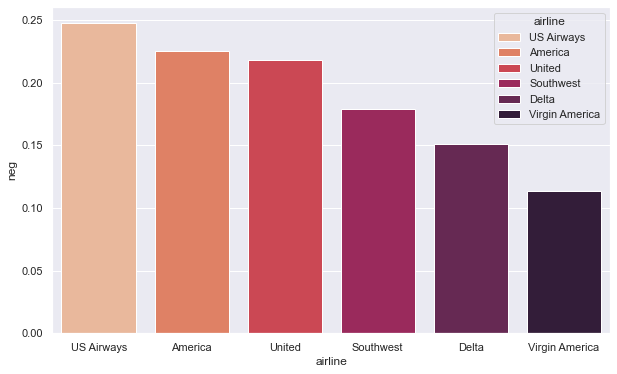

In [1580]:
#REORDER THE GROUPINGS
sns.set(rc={"figure.figsize":(10, 6)}) 
# sns.countplot(x='airline', hue='sentiment', data=df, palette='rocket_r', hue_order =['positive', 'neutral', 'negative'],
#               order = df['airline'].value_counts().index);


bar_order = sent_scores_df.sort_values('neg', ascending=False)['airline'].tolist()

sns.barplot(data = sent_scores_df, x='airline', y='neg', hue='airline',
           palette='rocket_r', hue_order = bar_order, order = bar_order,
            dodge=False);



### United, US Airways and American have compund scores of -1

In [ ]:
#let's test vader against ground truth

# 1. Make sure df2 has the tokenized words and sentiment_df for all
# 2. Split into train and test
# 3. Sentiment analysis on the train -> add the sentiment_vader column
# 4. Vectorize and transform train X, y is sentiment_Vader
# 5. Fit a logistic regression
# 6. Vectorizer tranform X test, y test is the human input y
# 7. Score the best estimator 

In [ ]:
'''
positive sentiment : (compound score >= 0.05) 
neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
negative sentiment : (compound score <= -0.05)
'''

In [ ]:
#neutral --> 0
#negative ---> 1
#positive ---> 2

In [1378]:
def sentiment_filter(df2):
    dct_df = {'sentiment_vader': [], 'score': []}

    for index,row in df2.iterrows():
        score = analyzer.polarity_scores(row['text_clean_2'])
        if score['compound'] <= -0.05:
            dct_df['sentiment_vader'].append(1)
            dct_df['score'].append(score['compound'])
            
        elif score['compound'] >= 0.05:
            dct_df['sentiment_vader'].append(2)
            dct_df['score'].append(score['compound'])
            
        else:
            dct_df['sentiment_vader'].append(0)
            dct_df['score'].append(score['compound'])
          
    df = pd.DataFrame(dct_df)
    
    return df

In [1379]:
df_vader = sentiment_filter(df2)

In [1380]:
df_vader

,sentiment_vader,score
0,2,0.3182
1,1,-0.5512
2,1,-0.4601
3,1,-0.4588
4,2,0.3182
...,...,...
14480,1,-0.4215
14481,0,0.0000
14482,0,0.0000
14483,0,0.0000


In [1381]:
df3 = df2

In [1382]:
df4 = df3.join(df_vader)

In [1383]:
df4.shape

(14485, 8)

In [1385]:
my_dict = {"positive": 2, "negative": 1, "neutral": 0}
df4 = df4.replace({"sentiment": my_dict})
 
df4

,airline,text,negativereason,sentiment,text_clean,text_clean_2,sentiment_vader,score
0,Delta,@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Greenfield Daily Reporter http://t.co/LM3opxkxch,,0,"[new, CEO, seeks, right, balance, please, passengers, Wall, Greenfield, Daily, Reporter]",new CEO seek right balance please passenger Wall Greenfield Daily Reporter,2,0.3182
1,Delta,@JetBlue is REALLY getting on my nerves !! 😡😡 #nothappy,Can't Tell,1,"[REALLY, getting, nerves, !, !, nothappy]",REALLY getting nerve ! ! nothappy,1,-0.5512
2,United,@united yes. We waited in line for almost an hour to do so. Some passengers just left not wanting to wait past 1am.,Late Flight,1,"[yes, We, waited, line, almost, hour, Some, passengers, left, wanting, wait, past]",yes We waited line almost hour Some passenger left wanting wait past,1,-0.4601
3,United,"@united the we got into the gate at IAH on time and have given our seats and closed the flight. If you know people is arriving, have to wait",Late Flight,1,"[got, gate, IAH, time, given, seats, closed, If, know, people, arriving, wait]",got gate IAH time given seat closed If know people arriving wait,1,-0.4588
4,Southwest,"@SouthwestAir its cool that my bags take a bit longer, dont give me baggage blue balls-turn the carousel on, tell me it's coming, then not.",Customer Service Issue,1,"[cool, bags, take, bit, longer, dont, give, baggage, blue, ballsturn, carousel, tell, coming]",cool bag take bit longer dont give baggage blue ballsturn carousel tell coming,2,0.3182
...,...,...,...,...,...,...,...,...
14480,Delta,@JetBlue I hope so because I fly very often and would hate to change airlines.,,0,"[I, hope, I, often, would, hate, change]",I hope I often would hate change,1,-0.4215
14481,US Airways,@USAirways is a DM possible if you aren't following me?,,0,"[DM, possible, following]",DM possible following,0,0.0000
14482,Delta,@JetBlue Yesterday on my way from EWR to FLL just after take-off. :)\n#wheelsup #JetBlueSoFly http://t.co/9xkiy0Kq2j,,2,"[Yesterday, way, EWR, FLL, takeoff, :_), wheelsup, JetBlueSoFly]",Yesterday way EWR FLL takeoff :_) wheelsup JetBlueSoFly,0,0.0000
14483,US Airways,@USAirways and when will one of these agents be available to speak?,Customer Service Issue,1,"[one, agents, available, speak]",one agent available speak,0,0.0000


## Vader + CountVec + Logistic Regression

In [1095]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_recall_curve, classification_report
from sklearn.metrics import roc_curve, auc, f1_score, roc_auc_score
import imblearn.over_sampling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [1386]:
#generate random list of numbers for indices
import random

lst = list(range(0,14485))
percent= round(0.3 * 14484)
  

test_index = random.sample(lst, percent)
  
len(n_index)

4345

In [1387]:
df_test = df4.iloc[test_index]

In [1388]:
len(df_test)

4345

In [1389]:
df_train = df4.drop(index=test_index)

In [1390]:
len(df_train) + len(df_test)

14485

In [1391]:
X_train = df_train['text_clean_2']
y_train = df_train['sentiment_vader']

In [1392]:
X_test = df_test['text_clean_2']
y_test = df_test['sentiment']

## CountVectorizer

In [1393]:
from sklearn.linear_model import LogisticRegression

In [1394]:
count_vectorizer = CountVectorizer(stop_words='english', max_df = 0.90, min_df = 0.01).fit(df_train['text_clean_2'])


In [1395]:
X_train = count_vectorizer.transform(X_train)


In [1396]:
c_params = [0.1, 1, 10, 100]

grid_params_lr = [{'C' : c_params, 
                   'class_weight' : [None, 'balanced']}]

In [1397]:
lr = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000), grid_params_lr, cv=3)



In [1398]:
lr.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000,
                                          multi_class='multinomial'),
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'class_weight': [None, 'balanced']}])

In [1399]:
X_test = count_vectorizer.transform(df_test['text_clean_2'])

In [1400]:
lr.best_estimator_.score(X_test, y_test)

0.5436133486766398

In [1401]:
best_model_lr = lr.best_estimator_

In [1533]:
best_model_lr

LogisticRegression(C=10, max_iter=10000, multi_class='multinomial')

In [1128]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


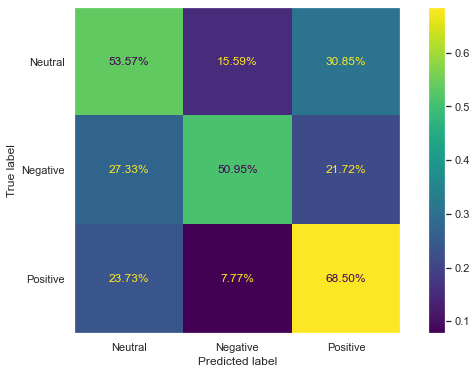

In [1604]:
plot_confusion_matrix(best_model_lr, X_test, y_test,
                      display_labels = ['Neutral', 'Negative', 'Positive'],
                     normalize = 'true', values_format='.2%')

plt.grid(visible=None);

In [1403]:
y_pred = best_model_lr.predict(X_test)


In [1404]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.54      0.42       911
           1       0.88      0.51      0.64      2726
           2       0.36      0.69      0.47       708

    accuracy                           0.54      4345
   macro avg       0.53      0.58      0.51      4345
weighted avg       0.68      0.54      0.57      4345



## negative precision is 88%

## TFIDF

In [1405]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.90, min_df = 0.01).fit(df_train['text_clean_2'])



In [1406]:
X_train_2 = tfidf_vectorizer.transform(df_train['text_clean_2'])



In [1407]:
lr2 = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000), grid_params_lr, cv=3)


In [1408]:
lr2.fit(X_train_2, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000,
                                          multi_class='multinomial'),
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'class_weight': [None, 'balanced']}])

In [1409]:
X_test_2 = tfidf_vectorizer.transform(df_test['text_clean_2'])

In [1410]:
lr2.best_estimator_.score(X_test_2, y_test)

0.5288837744533947

In [1411]:
best_model_lr_2 = lr2.best_estimator_

In [1534]:
best_model_lr_2

LogisticRegression(C=1, class_weight='balanced', max_iter=10000,
                   multi_class='multinomial')

In [1204]:
import matplotlib.pyplot as plt

In [1195]:
from sklearn.metrics import ConfusionMatrixDisplay

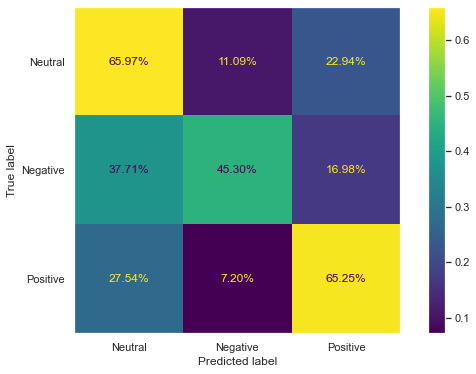

In [1605]:
ConfusionMatrixDisplay.from_estimator(best_model_lr_2, X_test_2, y_test,
                                      display_labels = ['Neutral', 'Negative', 'Positive'],
                     normalize = 'true', values_format='.2%')

plt.grid(visible=None)

In [1413]:
y_pred_2 = best_model_lr_2.predict(X_test_2)
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.33      0.66      0.44       911
           1       0.89      0.45      0.60      2726
           2       0.41      0.65      0.50       708

    accuracy                           0.53      4345
   macro avg       0.54      0.59      0.51      4345
weighted avg       0.69      0.53      0.55      4345



## Negative precision is at 89%

## Topic Modeling on Negative tweets - Count Vectorizer + NMF 

In [1066]:
from sklearn.decomposition import NMF


In [ ]:
pd.set_option('display.max_colwidth', None)

In [1416]:
df5 = df4.copy()

In [1419]:
df5['text_clean_2'] = df5['text_clean_2'].map(lambda x: x.lower())

In [1420]:
punct_2 = string.punctuation

df5['text_clean_2'] = df5['text_clean_2'].map(lambda x: re.sub('[%s]' % re.escape(punct_2), '', x))


In [1427]:
df5['text_clean_3'] = df5['text_clean_2'].map(lambda x: re.sub(r"\bflightr\b","flight",x))

In [1428]:
df5['text_clean_3'] = df5['text_clean_3'].map(lambda x: re.sub(r"\bflightled\b","flight",x))


In [1441]:
df5['text_clean_3'] = df5['text_clean_3'].map(lambda x: re.sub(r"\bnt\b","",x))
df5['text_clean_3'] = df5['text_clean_3'].map(lambda x: re.sub(r"\bmin\b","minute",x))



In [ ]:
df5['text_clean_3'] = df5['text_clean_3'].map(lambda x: re.sub(r"\bflighted\b","flight",x))


In [1435]:
df5['text_clean_3'] = df5['text_clean_3'].apply(clean_stopword)

In [1442]:
df_neg = df5[(df5['sentiment_vader']==1)]

In [1447]:
#bigrams not useful; removed ngram_range=(1,2)

vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.90, min_df = 0.01)
doc_term_matrix = vectorizer.fit_transform(df_neg['text_clean_3'])

nmf = NMF(15) #10 topics
nmf.fit(doc_term_matrix)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=15)

In [1448]:
h_matrix = nmf.components_ #H matrix
w_matrix = nmf.transform(doc_term_matrix) #W matrix

In [1449]:
#top words in each topic

num_words = 20
vocab = np.array(vectorizer.get_feature_names_out())

top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_words-1:-1]]
topic_words = ([top_words(x) for x in h_matrix])
topics = [' '.join(x) for x in topic_words]

In [1450]:
topics

['hour wait hold got sitting phone thanks ago airport home luggage finally like seriously trying stuck told ridiculous update left',
 'customer service terrible poor bad rude horrible disappointed line response suck staff rep agent today lost phone guy really people',
 'cancelled today tomorrow weather dfw rebook hotel refund got home rebooked trying want email morning going trip ticket booked tonight',
 'plane issue sitting gate passenger stuck let know left jfk way pilot getting fail crew ca problem boarding new weather',
 'hold minute help reservation trying wait rebook unacceptable answer long line rep online going called ridiculous know website book let',
 'delayed connection miss way missed make pm gate jfk pilot getting going today update problem hotel week missing crew say',
 'bag lost check baggage minute wait missing thanks people fail airport ago pay wrong know luggage guy staff said flying',
 'time wait long issue minute boarding gate tried today flying guy called thanks le

# CorEx

In [1465]:
!pip install corextopic

In [1466]:
from corextopic import corextopic as ct

In [1467]:
words = list(np.asarray(vectorizer.get_feature_names()))

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [1471]:
topic_model = ct.Corex(n_hidden=10, words=words)


topic_model.fit(doc_term_matrix, words=words)


In [1472]:
topics_c = topic_model.get_topics()

In [1473]:
for n,topic in enumerate(topics_c):
    topic_words,_,_ = zip(*topic)
    print(f'{n}: {", ".join(topic_words)}')

0: problems, booking, online, number, change, plane, phone, website, reservation, sitting
1: airport, going, pay, people, seat, stuck
2: leave, line, service, tell, terrible, thanks, told, wrong
3: disappointed, getting, passenger, poor, refund, sorry, travel, weather, work
4: agent, answer, bad, baggage, boarding, day, flt, horrible, hour, know
5: experience, got, issue, like, new, really, ridiculous, right, said, seriously
6: check, email, fail, finally, let, luggage, make, pm, trip
7: ago, jfk, morning, pilot, response, voucher, way
8: called, guy, missed, stop, today, unacceptable, update
9: customer, dfw, flying, home, hotel, left, minute, problem, rebook, rude


## some anchors

In [1547]:
topic_model_2 = ct.Corex(n_hidden=10, words=words)


topic_model_2.fit(doc_term_matrix, words=words)

In [1548]:
topics_c_2 = topic_model_2.get_topics()

In [1549]:
for n,topic in enumerate(topics_c_2):
    topic_words,_,_ = zip(*topic)
    print(f'{n}: {", ".join(topic_words)}')

0: problems, booking, online, number, change, plane, phone, reservation, website, sitting
1: airport, email, got, problem, response, wait
2: answer, leave, minute, night, pay, poor, seriously, service, stuck, voucher
3: finally, flying, left, people, said, today, tonight, week, work
4: boarding, book, long, new, say, sorry, travel, way, wrong
5: agent, ago, dfw, fail, know, like, missed, tried, update
6: hotel, hour, late, line, rebooked, seat, stop, weather
7: bad, called, customer, experience, going, jfk, missing, passenger, pm, rude
8: check, day, guy, horrible, make, morning, really, refund, ridiculous, suck
9: flt, getting, let


In [1555]:
pd.set_option('display.max_row', None)

In [1606]:
df2[(df2['text'].str.contains('issue')) & (df2['sentiment']=='negative')].head(40)

,airline,text,negativereason,sentiment,text_clean,text_clean_2
279,US Airways,@USAirways issues are not with people who r nice or storm emails with wrong phone numbers auto rebooked flights to non connecting cities,Customer Service Issue,negative,"[issues, people, r, nice, storm, emails, wrong, phone, numbers, auto, rebooked, non, connecting, cities]",issue people r nice storm email wrong phone number auto rebooked non connecting city
303,United,@united Second day &amp; attempt trying to leave IAD &amp; I'm on another plane delayed for mechanical issues. Over an hour delayed!,Late Flight,negative,"[Second, day, attempt, trying, leave, IAD, I, 'm, another, plane, delayed, mechanical, issues, Over, hour, delayed, !]",Second day attempt trying leave IAD I 'm another plane delayed mechanical issue Over hour delayed !
326,Southwest,@SouthwestAir how about when there are Cancelled Flightlations you just have a link to rebook like you did for initial storm issues?,Cancelled Flight,negative,"[Cancelled, Flightlations, link, rebook, like, initial, storm, issues]",Cancelled Flightlations link rebook like initial storm issue
401,United,"@united she has crossed 4 prior times with other carriers and no issue. Karen was rude, untrained and unhelpful I also spoke",Flight Attendant Complaints,negative,"[crossed, prior, times, carriers, issue, Karen, rude, untrained, unhelpful, I, also, spoke]",crossed prior time carrier issue Karen rude untrained unhelpful I also spoke
444,United,@united thanks kp but luckily my transfer has maintenance issues and is still delayed so I didn't miss my transfer...,Late Flight,negative,"[thanks, kp, luckily, transfer, maintenance, issues, still, delayed, I, miss, transfer]",thanks kp luckily transfer maintenance issue still delayed I miss transfer
621,United,"@united flight 86 LAX-IAD, back rows NOT CLEANED prior to boarding. How gross is that to find used tissues in your seat? Please.",Bad Flight,negative,"[LAXIAD, back, rows, NOT, CLEANED, prior, boarding, How, gross, find, used, tissues, seat, Please]",LAXIAD back row NOT CLEANED prior boarding How gross find used tissue seat Please
728,United,@united JT the issue is with missed connections early gate closings and zero concern from customer service,Customer Service Issue,negative,"[JT, issue, missed, connections, early, gate, closings, zero, concern, customer, service]",JT issue missed connection early gate closing zero concern customer service
804,United,@united stuck here in IAH waiting on flight 253 to Honolulu for 7 hours due to maintenance issues. Could we have gotten a new plane!?!? Fail,Late Flight,negative,"[stuck, IAH, waiting, Honolulu, hours, due, maintenance, issues, Could, gotten, new, plane, !, !, Fail]",stuck IAH waiting Honolulu hour due maintenance issue Could gotten new plane ! ! Fail
820,United,@united If you have had any issues with United Airlines PLEASE retweet. Paid for a full fight ticket and was given a standby instead.,Flight Booking Problems,negative,"[If, issues, United, Airlines, PLEASE, retweet, Paid, full, fight, ticket, given, standby, instead]",If issue United Airlines PLEASE retweet Paid full fight ticket given standby instead
846,US Airways,"@USAirways And really, it's a middle initial versus middle name. All else the same. Not spending my time on your computer issues.",Customer Service Issue,negative,"[And, really, middle, initial, versus, middle, name, All, else, Not, spending, time, computer, issues]",And really middle initial versus middle name All else Not spending time computer issue


In [1456]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [1457]:
sent = "Today we are quietly playing in Los Angeles jazz music."

In [1458]:
doc = nlp(sent)

In [1461]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Today DATE
Los Angeles GPE


In [1462]:
from spacy.lang.en.stop_words import STOP_WORDS

In [1463]:
stopwords = list(STOP_WORDS)

## Word2Vec

In [666]:
!pip install gensim

     |████████████████████████████████| 24.0 MB 30.4 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 25.6 MB/s eta 0:00:01


In [667]:
from gensim.models import Word2Vec

In [1451]:
w2v = df5.text_clean_3.apply(tokenize).to_list()

word2vec = Word2Vec(sentences = w2v, vector_size = 100, min_count = 5)

In [1452]:
w2v[:3]

[['new',
  'ceo',
  'seek',
  'right',
  'balance',
  'please',
  'passenger',
  'wall',
  'greenfield',
  'daily',
  'reporter'],
 ['really', 'getting', 'nerve', 'nothappy'],
 ['yes',
  'waited',
  'line',
  'almost',
  'hour',
  'passenger',
  'left',
  'wanting',
  'wait',
  'past']]

In [1614]:
word2vec.wv.most_similar('hate')

[('ask', 0.9993498921394348),
 ('le', 0.9993187785148621),
 ('oh', 0.9993131756782532),
 ('jetblue', 0.9992700815200806),
 ('tweet', 0.9992366433143616),
 ('direct', 0.9992278218269348),
 ('food', 0.9992222785949707),
 ('hear', 0.9992200136184692),
 ('nice', 0.9992064237594604),
 ('start', 0.999203622341156)]

In [1603]:
word2vec.wv.most_similar('going')

[('dfw', 0.998944878578186),
 ('leave', 0.9989339113235474),
 ('pm', 0.998862087726593),
 ('departure', 0.9988583922386169),
 ('take', 0.9987350106239319),
 ('leaving', 0.9986701011657715),
 ('flt', 0.9986398816108704),
 ('phl', 0.9985857605934143),
 ('stuck', 0.9985722899436951),
 ('arrive', 0.9985653162002563)]

In [1454]:
word2vec.wv.most_similar('customer')

[('ever', 0.98089998960495),
 ('worst', 0.9762243032455444),
 ('experience', 0.9579900503158569),
 ('service', 0.9493043422698975),
 ('terrible', 0.9295005798339844),
 ('experienced', 0.9280650019645691),
 ('great', 0.915199875831604),
 ('flying', 0.9134176969528198),
 ('never', 0.9091744422912598),
 ('poor', 0.9089339375495911)]

In [1607]:
word2vec.wv.most_similar('issue')

[('clt', 0.9985756278038025),
 ('bc', 0.9984889626502991),
 ('ewr', 0.9984605312347412),
 ('update', 0.9984589219093323),
 ('pilot', 0.9983746409416199),
 ('yet', 0.9983615875244141),
 ('flt', 0.9983411431312561),
 ('boston', 0.9983382225036621),
 ('computer', 0.9983375668525696),
 ('houston', 0.9983298778533936)]

In [1613]:
word2vec.wv.most_similar('home')

[('tomorrow', 0.9971962571144104),
 ('day', 0.9968511462211609),
 ('rebooked', 0.9966753125190735),
 ('going', 0.9966398477554321),
 ('rebook', 0.9965564608573914),
 ('dfw', 0.9965444207191467),
 ('cancelled', 0.9964832663536072),
 ('pm', 0.9964529871940613),
 ('tonight', 0.9964100122451782),
 ('take', 0.9963696599006653)]

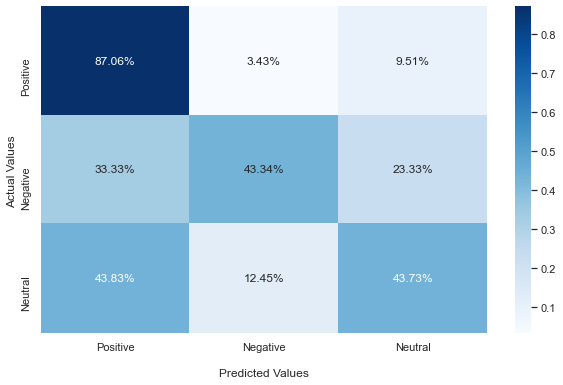

In [827]:
'''
import seaborn as sns

ax = sns.heatmap(vader_confusion_matrix, annot=True, cmap='Blues', fmt='.2%')
ax.xaxis.set_ticklabels(['Positive', 'Negative', 'Neutral'])
ax.yaxis.set_ticklabels(['Positive', 'Negative', 'Neutral'])

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
'''


In [ ]:
#TOP TWEETS WITH NEGATIVE SENTIMENT
for index,row in df_neg.sort_values('score', ascending=True).iterrows():
    if len(row['tweet'].split(" "))>1:
        print(row['tweet'], row['score'])